1) Import Libraries
2) Import Data
3) Task
    - Create Histogram of hour_of_day
    - Create bar chart of Loyalty_flag
    - Sampling for further steps
    - Create line chart of hour_of_day and prices
    - Create line chart of age and n_dependants
    - Create scatterplot of age and income

# 01 Import Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Import Data

In [2]:
path = r'C:\Users\benar\CareerFoundry\09-2023 Instacart Basket Analysis'

In [3]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [4]:
ords_prods_cust_merge.head()

,user_id,first_name,surname,gender,state,age,n_dependants,fam_status,income,product_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_spend,spender_flag,median_order_frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,196,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,196,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,196,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,6184,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,6184,...,Low-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
ords_prods_cust_merge.shape

(32404859, 31)

In [6]:
ords_prods_cust_merge.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'n_dependants', 'fam_status', 'income', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_spend', 'spender_flag', 'median_order_frequency',
       'order_frequency_flag'],
      dtype='object')

# 03 Task

Text(0, 0.5, 'orders(in millions)')

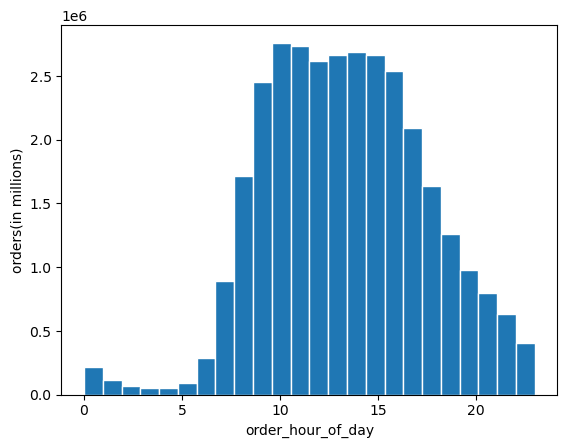

In [4]:
#3 Create histogram of 'order_hour_of_day' column
hist = ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 24, edgecolor = 'white')
plt.xlabel('order_hour_of_day')
plt.ylabel('orders(in millions)')

In [5]:
#Exporting histogram
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_order_hod.png'))

The most orders/purchases by customers are in hour 10. From hour 9 to 17, or 9 am to 5 pm, is the busiest time period with the most order/purchases. The lowest period of sales happen from hour 1 am to 5 am.

Text(0, 0.5, 'orders(in ten millions)')

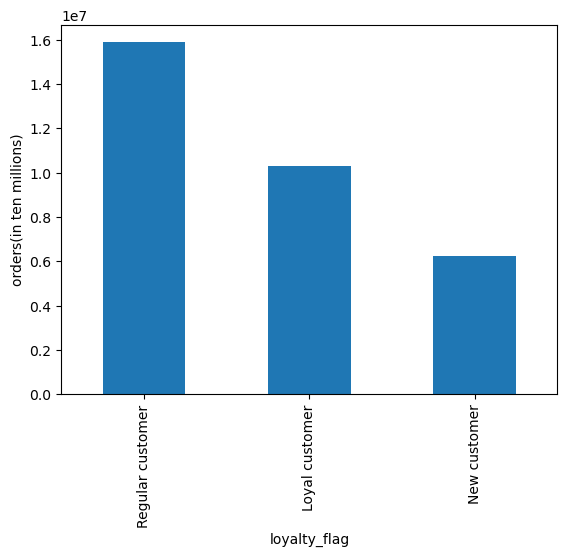

In [9]:
#4 Create bar chart of 'loyalty_flag' column
bar = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()
plt.ylabel('orders(in ten millions)')

In [10]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [10]:
#Exporting with better dimensions to show bottom axis legend.
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_flag_2.png'), bbox_inches='tight')

Below this is sampling for problems 5 and 6

In [11]:
#Setting seed to 4 and creating list holding True/False values to np.random.rand() function <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust_merge)) <= 0.7

In [12]:
#Store 70% of the sample in "big" dataframe
big = ords_prods_cust_merge[dev]

In [13]:
#Store 30% of the sample in "small" dataframe
small = ords_prods_cust_merge[~dev]

In [14]:
len(ords_prods_cust_merge)

32404859

In [15]:
len(big) + len(small)

32404859

In [16]:
#Creating dataframe for another line chart
df_2 = small[['order_hour_of_day', 'prices']]

In [17]:
df_2.head()

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,4.3
6,9,4.3
10,9,4.0


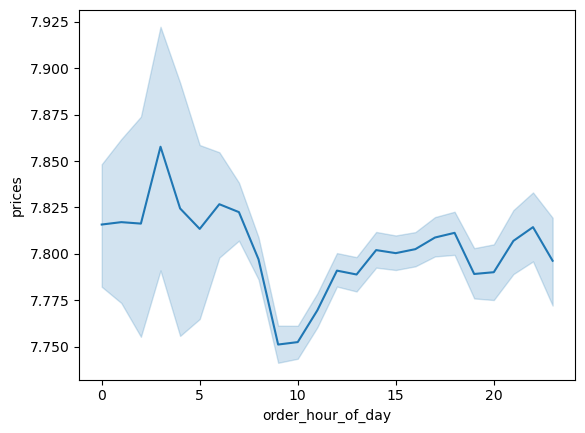

In [18]:
#5 Create line chart for 'order_hour_of_day' and 'prices'
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [19]:
#Exporting line chart
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_order_hod_prices_sample.png'))

In [20]:
#Creating dataframe for another line chart 
df_1 = small[['age', 'n_dependants']]

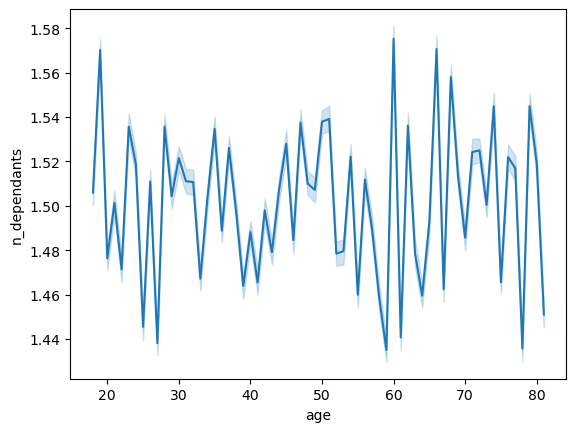

In [21]:
#6 Create line chart for 'age' and 'n_dependants'
line_2 = sns.lineplot(data = df_1, x = 'age',y = 'n_dependants')

It's hard to notice any trend here, but there might be a small tendancy for higher age to coorelate to fewer dependants, but it is rather unclear.  The clearest thing to take away from this line chart is that "middle age" customers of of 35 to 50 probably have at least one dependant since there is not much fluctuation in the graph in this section.

In [22]:
#Exporting line chart
line_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_dependants_sample.png'))

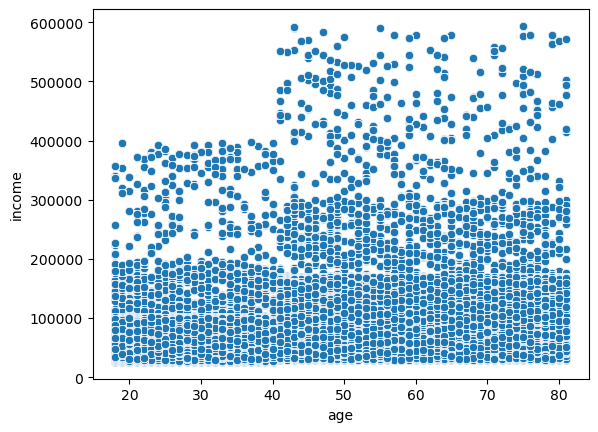

In [23]:
#7 Create scatterplot of 'age' and 'income'
scatter = sns.scatterplot(x = 'age', y = 'income',data = small)

The upward bound of income for customers below 40 is about 400,000. For customers over 40, they have income that can reach 600,000. This age group of 40 to 80 also has more customers with 200,000 to 300,000 income. So, it seems safe to conclude that there might be a strong coorelation between higher age equals higher income, or higher spending power.

In [24]:
#Exporting scatterplot
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_age_income.png'))